## Robert Neville BDAT1004 Assignment 3

In [402]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [400]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",delimiter="|")
#print(users)
agemean = users.groupby(['occupation'])["age"].mean()
sexratio = (users.loc[users["gender"] == "M"]["occupation"].value_counts()/users.loc[users["gender"] == "F"]["occupation"].value_counts()).sort_values(ascending=False)
agemax = users.groupby(['occupation'])["age"].max()
agemin = users.groupby(['occupation'])["age"].min()

magemax = users.loc[users["gender"] == "M"].groupby(['occupation'])["age"].max()
magemin = users.loc[users["gender"] == "M"].groupby(['occupation'])["age"].min()
fagemax = users.loc[users["gender"] == "F"].groupby(['occupation'])["age"].max()
fagemin = users.loc[users["gender"] == "F"].groupby(['occupation'])["age"].min()

mpercent = 100 * users.loc[users["gender"] == "M"]["occupation"].value_counts() / users["occupation"].value_counts()
fpercent = 100 * users.loc[users["gender"] == "F"]["occupation"].value_counts() / users["occupation"].value_counts()

### Question 2

In [128]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12['Goals'] #selected only goals.
#16 teams, 35 columns.
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.sort_values(by=['Yellow Cards'], ascending = False)
discipline.sort_values(by=['Red Cards'], ascending = False)
meanyellows = np.mean(euro12['Yellow Cards']) #7.4375
over6 = euro12.loc[euro12["Goals"] >= 6] #germany, italy, portugal, spain
gstart = euro12.loc[euro12["Team"].str.contains("G")] #germany, greece
first7 = euro12.iloc[:7] #croatia, czechia, denmark, england, france, germany, greece
first13 = euro12.iloc[:len(euro12)-3] #up to russia
finaltable = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"])][["Team", "Shooting Accuracy"]] #50, 43, 22.5

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3

In [161]:
h1 = np.random.randint(0,5,100)
h2 = np.random.randint(0,4,100)
h3 = np.random.randint(10000,30001,100)
housing = pd.DataFrame(data = {'bedrs':h1, 'bathrs':h2, 'price_sqr_meter':h3})
housing
bigcolumn = pd.DataFrame(data = {'bc':pd.concat([housing['bedrs'],housing['bathrs'],housing['price_sqr_meter']])}) #not properly indexed
bigcolumn.reset_index()['bc']

0          4
1          3
2          3
3          2
4          3
       ...  
295    25857
296    15600
297    12474
298    14986
299    23637
Name: bc, Length: 300, dtype: int32

### Question 4

In [294]:
wind = pd.read_csv(r'C:\Users\Brad\Downloads\wind.txt', delim_whitespace=True)
wind = wind.rename(columns={"Yr":"year","Mo":"month","Dy":"day"})
wind["year"] += 1900
d = pd.to_datetime(wind[["year", "month", "day"]])
wind = wind.drop(["year", "month", "day"], axis=1)
wind = wind.set_index(d)
nancolumns = np.isnan(wind).sum()
nantotal = nancolumns.sum() #31
datatotal = wind.size - nantotal #78857
totalmean = wind.mean().mean() #10.227982360836924
loc_stats = pd.DataFrame(data = {'min':wind.min(),'max':wind.max(),'mean':wind.mean(),'std':wind.std()})
day_stats = pd.DataFrame(data = {'min':wind.min(axis=1),'max':wind.max(axis=1),'mean':wind.mean(axis=1),'std':wind.std(axis=1)})
janmean = wind.iloc[wind.index.month == 1].mean()
ywind = wind.resample('1Y').mean()
mwind = wind.resample('1M').mean()
wwind = wind.drop(wind.index[0]).resample('1W').mean()
week_stats = pd.DataFrame(data = {'min':wwind.min(axis=1),'max':wwind.max(axis=1),'mean':wwind.mean(axis=1),'std':wwind.std(axis=1)}).iloc[:52]
week_stats

,min,max,mean,std
1961-01-08,6.417143,13.541429,9.847659,2.601705
1961-01-15,4.630000,12.468571,8.353214,2.719649
1961-01-22,6.328571,13.204286,9.368413,2.224531
1961-01-29,12.720000,22.530000,16.958095,2.915635
1961-02-05,8.247143,16.827143,11.800357,2.807310
1961-02-12,10.774286,21.832857,15.891548,3.147412
1961-02-19,9.542857,21.167143,13.726825,3.105819
1961-02-26,8.524286,16.304286,12.604286,2.364323
1961-03-05,7.834286,17.842857,11.766766,2.535336
1961-03-12,6.881429,16.701429,10.612579,2.746233


### Question 5

In [390]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter = '	')
chipo.iloc[:10]
n_obs = len(chipo) #4622
n_cols = len(chipo.columns) #5
cols = chipo.columns #order_id', 'quantity', 'item_name', 'choice_description','item_price
#the data is indexed by items ordered
n_items = chipo['item_name'].value_counts() #Chicken Bowl 726
items = chipo.loc[~chipo['choice_description'].isnull()]['choice_description'].str.replace('[','').str.replace(']','').str.split(",",expand=False).explode()
#there are 15754 items
items.value_counts() #Rice 2383
chipo["item_price"] = chipo["item_price"].apply(lambda x: float((x.replace('$',''))))
pricesum = chipo["item_price"].sum() #34500.16
maxorder = chipo["order_id"].max() #1834
avgorder = chipo["item_price"].mean() #$7.46
numitems = chipo['item_name'].nunique() #50

50

### Question 6

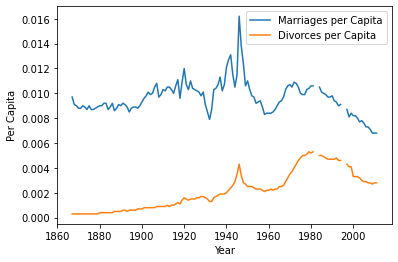

In [407]:
ds6 = pd.read_csv(r'C:\Users\Brad\Downloads\us-marriages-divorces-1867-2014.csv',delimiter=",")
plt.plot(ds6['Year'],0.001*ds6['Marriages_per_1000'])
plt.plot(ds6['Year'],0.001*ds6['Divorces_per_1000'])
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.legend(['Marriages per Capita', 'Divorces per Capita'])

### Question 7

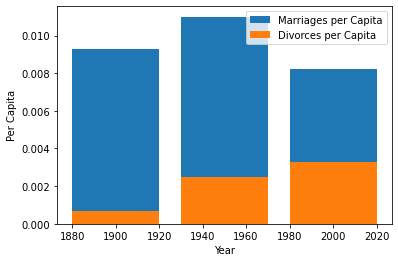

In [417]:
ds6 = pd.read_csv(r'C:\Users\Brad\Downloads\us-marriages-divorces-1867-2014.csv',delimiter=",")
plt.bar([1900, 1950, 2000],0.001*ds6.loc[ds6["Year"].isin([1900, 1950, 2000])]['Marriages_per_1000'], width = 40)
plt.bar([1900, 1950, 2000],0.001*ds6.loc[ds6["Year"].isin([1900, 1950, 2000])]['Divorces_per_1000'], width = 40)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.legend(['Marriages per Capita', 'Divorces per Capita'])

### Question 8

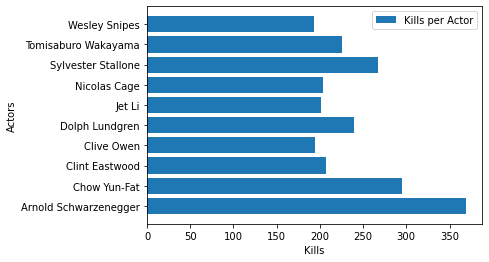

In [422]:
ds8 = pd.read_csv(r'C:\Users\Brad\Downloads\actor_kill_counts.csv',delimiter=",")
plt.barh(ds8['Actor'],ds8['Count'])
plt.xlabel("Kills")
plt.ylabel("Actors")
plt.legend(['Kills per Actor'])

### Question 9

([<matplotlib.patches.Wedge at 0x20bdcdf8c40>,
 [Text(0.5790753482603685, 0.9352388684379692, 'Assassinated'),
  Text(-1.025719479700726, 0.3973657621920542, 'Natural causes'),
  Text(-0.8129097548643817, -0.7410652673323255, 'Killed in battle'),
  Text(-0.10149511246469993, -1.0953076016105148, 'Possibly assassinated'),
  Text(0.5352650097816886, -0.9609845832808188, 'Illness'),
  Text(0.9074972879645549, -0.6216499596533229, 'Suicide'),
  Text(1.0707818897912493, -0.25184547741637286, 'Executed'),
  Text(1.0988262785166438, -0.05080166967003301, 'Died in captivity')])

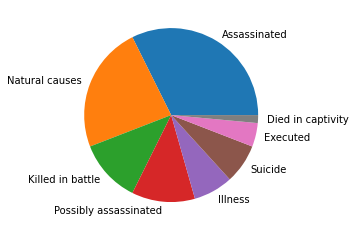

In [433]:
ds9 = pd.read_csv(r'C:\Users\Brad\Downloads\roman-emperor-reigns.csv',delimiter=",")
ds9a = ds9['Cause_of_Death'].value_counts()
plt.pie(ds9a, labels=ds9a.index)

### Question 10

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

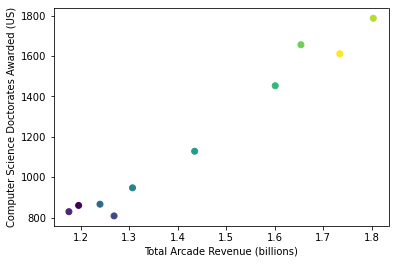

In [441]:
ds10 = pd.read_csv(r'C:\Users\Brad\Downloads\arcade-revenue-vs-cs-doctorates.csv',delimiter=",")
plt.scatter(ds10['Total Arcade Revenue (billions)'], ds10['Computer Science Doctorates Awarded (US)'], c=ds10['Year'])
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")